ESTUDIO SOBRE LA MUESTRA DE DATOS DE JOSE V.2. 30/01/2024

In [30]:
### Cargamos las librerías necesarias para el estudio

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [80]:
### Cargamos los datos y vemos datos esenciales

df_sucio = pd.read_csv('MUESTREO_26012024_5939.txt', delimiter=',')

In [81]:
df_sucio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       5938 non-null   object 
 1   A       5938 non-null   float64
 2   V       5938 non-null   float64
 3   S       5938 non-null   float64
dtypes: float64(3), object(1)
memory usage: 185.7+ KB


In [82]:
print(df_sucio.head(20)) 

           t      A     V      S
0   19:38:10   2.07  0.00 -33.52
1   19:38:11   4.19  0.00 -31.28
2   19:38:11   0.00 -1.36 -24.09
3   19:38:11   0.00 -5.78 -39.93
4   19:38:11   0.00 -3.14 -36.58
5   19:38:11   0.00 -3.06 -49.91
6   19:38:11   0.00 -6.68 -47.27
7   19:38:11  38.86  0.00 -45.56
8   19:38:11  42.48  0.00 -35.13
9   19:38:11  41.22  0.00 -20.02
10  19:38:12  41.26  0.00 -18.88
11  19:38:12  52.78  0.00 -12.73
12  19:38:12  68.16  0.00  -9.15
13  19:38:12  64.85  0.00  -9.15
14  19:38:12  72.27  0.00  -6.96
15  19:38:12  72.06  0.00 -12.59
16  19:38:12  72.44  0.00 -16.07
17  19:38:12  71.96  0.00 -17.58
18  19:38:13  74.12  0.00 -14.61
19  19:38:13  72.60  0.00 -17.36


In [83]:
df_sucio.tail()

,t,A,V,S
5933,19:49:57,0.48,0.0,22.52
5934,19:49:57,0.55,0.0,23.14
5935,19:49:57,0.60,0.0,21.83
5936,19:49:57,0.42,0.0,23.88
5937,19:49:57,1.28,0.0,23.03


Seguimos las indicaciones según José. Por cierto, según se supone, los datos de la columna "V" deberían 
pertenecer a la columna "S".
Vamos a separar los dataframes. 1 será la resultante de las columnas tiempo, 'A' y 'S', el otro de tiempo y 'V'


In [84]:
df = df_sucio[['t','A','S']].copy()

In [85]:
dfv = df_sucio[['t','V']].copy()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       5938 non-null   object 
 1   A       5938 non-null   float64
 2   S       5938 non-null   float64
dtypes: float64(2), object(1)
memory usage: 139.3+ KB


Empezamos a trabajar con el primer dataframe (t, A, S)
Ahora lo complicado del código. Normalmente se pasaría la columna t a datetime, pero por esta vez vamos a dejarlo en string, dado que están ordenados.
Voy a hacer una función para agrupar por el máximo en 'A' de cada segundo

In [87]:
# Agrupamos los datos por la columna 't'.
grouped = df.groupby('t', as_index=False)

# Hacemos la función lambda con el apply para el valor máximo del índice
max_a_s = grouped.apply(lambda x: x.loc[x['A'].idxmax()])

# Volvemos a dejar el índice como estaba antes de la agrupación
max_a_s = max_a_s.reset_index(drop=True)

print(max_a_s)


            t      A      S
0    19:38:10   2.07 -33.52
1    19:38:11  42.48 -35.13
2    19:38:12  72.44 -16.07
3    19:38:13  74.97 -14.93
4    19:38:14  76.32   3.98
..        ...    ...    ...
654  19:49:53   1.45  24.16
655  19:49:54   2.98  25.37
656  19:49:55   2.79  23.33
657  19:49:56   0.81  22.68
658  19:49:57   1.28  23.03

[659 rows x 3 columns]


Como podemos ver, hay 659 valores en el dataframe resultante. El conteo del dataset original es 5938, con lo cual:
El porcentaje como vemos más abajo es de aproximadamente el 11.10%, lo cual a priori es bajo.  
Una manera de comprobar que efectivamente hemos hecho bien el aislar el hh:mm:ss en valores únicos es:
Primera hora registrada: 19:38:10, última hora registrada: 19:49:57 . La resta resultante es 707, es decir, 11 minutos 47 segundos
El conteo de valores únicos: 659, es decir 10 minutos 59 segundos. La discrepancia es de 48 segundos.
Puede deberse a que no todos los segundos contienen 9 mediciones, datos duplicados o faltantes y el redondeo de cada valor único. 

In [88]:
cuenta_segundos = df_sucio['t'].nunique()
print(f"El número de valores únicos en la columna t es: {cuenta_segundos}")

El número de valores únicos en la columna t es: 659


In [89]:
cuenta_total = df_sucio['t'].value_counts().sum()
print(f"El número de valores únicos en la columna t es: {cuenta_total}")

El número de valores únicos en la columna t es: 5938


In [90]:
porcentaje = (cuenta_segundos / cuenta_total) * 100
print(f"El porcentaje de valores sobre el total del dataframe es: {porcentaje:.2f}%")

El porcentaje de valores sobre el total del dataframe es: 11.10%


In [91]:
# Renombramos el dataframe para mayor facilidad
data = max_a_s

In [92]:
data.head(20)

,t,A,S
0,19:38:10,2.07,-33.52
1,19:38:11,42.48,-35.13
2,19:38:12,72.44,-16.07
3,19:38:13,74.97,-14.93
4,19:38:14,76.32,3.98
5,19:38:15,0.00,-20.99
6,19:38:16,82.18,-0.44
7,19:38:17,14.32,-12.71
8,19:38:18,81.41,8.05
9,19:38:19,51.33,-31.85


In [93]:
data.tail()

,t,A,S
654,19:49:53,1.45,24.16
655,19:49:54,2.98,25.37
656,19:49:55,2.79,23.33
657,19:49:56,0.81,22.68
658,19:49:57,1.28,23.03


In [94]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
A,659.0,39.252792,25.112261,0.00,18.29,39.79,60.045,88.19
S,659.0,-6.832322,15.584638,-50.93,-14.93,-9.76,-2.410,67.59


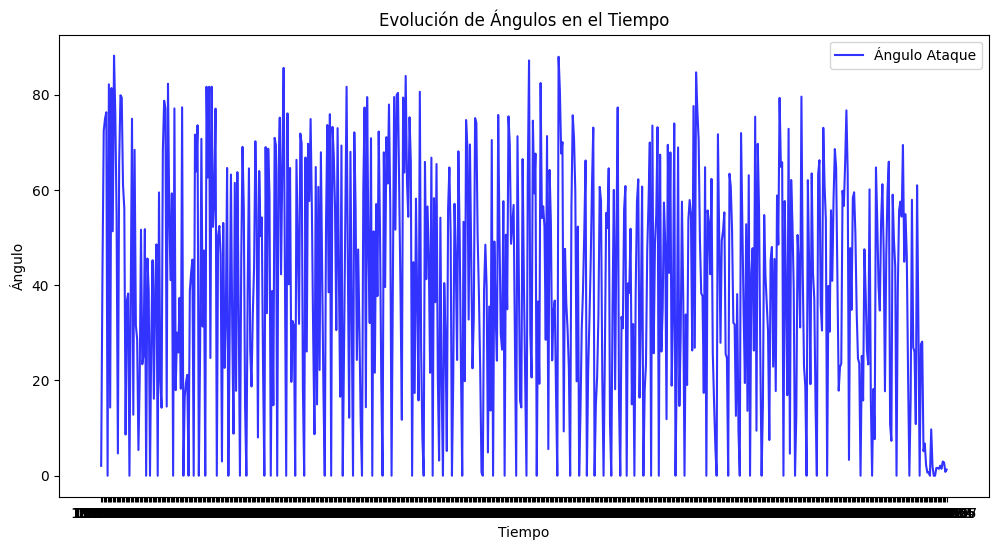

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(data['t'], data['A'], label='Ángulo Ataque', color='blue', alpha=0.8)
plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.title('Evolución de Ángulos en el Tiempo')
plt.legend()
plt.show()

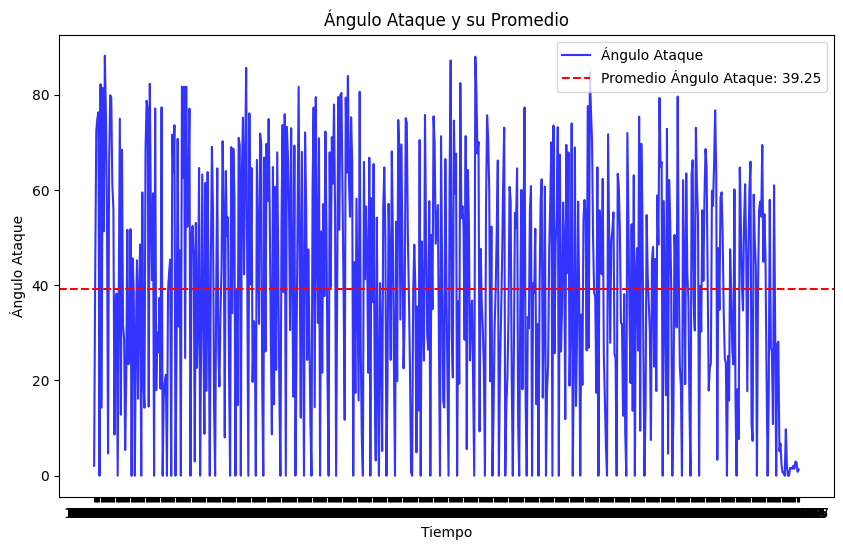

In [96]:
media_A = data['A'].mean()

plt.figure(figsize=(10, 6))
plt.plot(data['t'], data['A'], label='Ángulo Ataque', color='blue', alpha=0.8)
plt.axhline(y=media_A, color='red', linestyle='--', label=f'Promedio Ángulo Ataque: {media_A:.2f}')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo Ataque')
plt.title('Ángulo Ataque y su Promedio')
plt.legend()
plt.show()

In [97]:
### Sigue saliendo, pese a haber hecho el filtrado de aislar el valor máximo por cada segundo, muchos valores pequeños, muy por debajo de la media

count_values = data['A'].gt(40) & data['A'].lt(80)
total_count = count_values.sum()

print(f"El número de valores en la columna 'A' entre 40 y 80 es: {total_count}")


El número de valores en la columna 'A' entre 40 y 80 es: 311


In [98]:
### Vamos a ver cuántos datos del dataset original en la columna 'A' es mayor que 1
mayorqueuno = df_sucio['A'].gt(1)
conteo1 = mayorqueuno.sum()

print(f"El número de valores de 'A' mayor que 1 es: {conteo1}")

El número de valores de 'A' mayor que 1 es: 906


In [99]:
### Con lo cual deducimos facilmente que:
porc_mas1 = (conteo1 / cuenta_total ) *100
print(f"El porcentaje de datos de la columna 'A' cuyos valores son > 1 es del {porc_mas1:.2f}%")


El porcentaje de datos de la columna 'A' cuyos valores son > 1 es del 15.26%


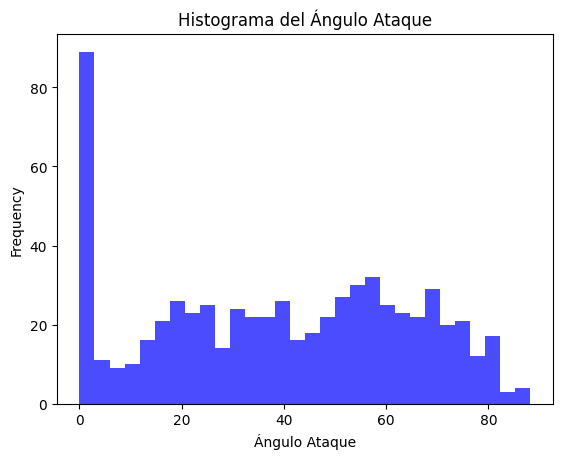

In [100]:
data['A'].plot(kind='hist', bins=30, alpha=0.7, color='blue')
plt.xlabel('Ángulo Ataque')
plt.title('Histograma del Ángulo Ataque')
plt.show()

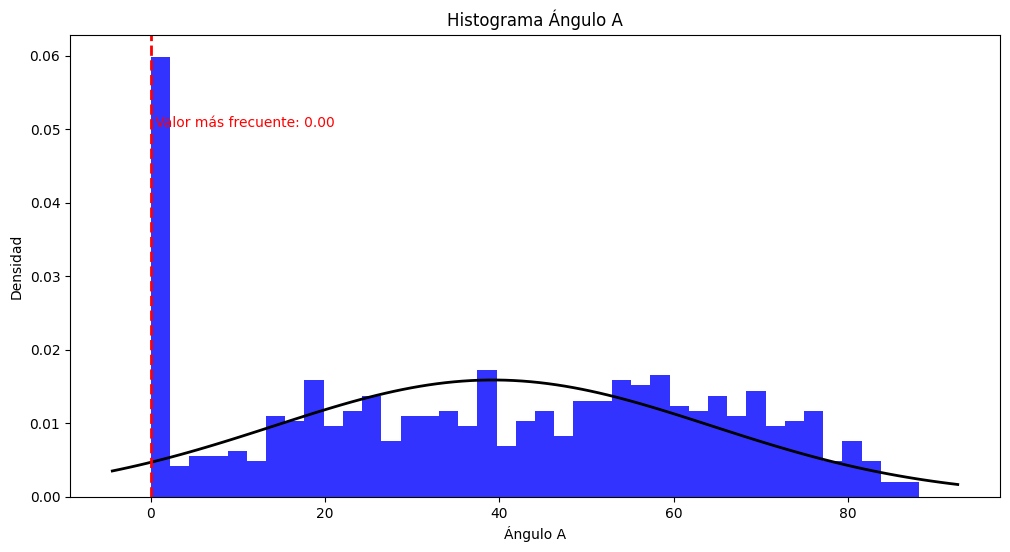

In [101]:
### Voy a añadir la curva de distribución y el valor más frecuente

plt.figure(figsize=(12, 6))
data['A'].plot(kind='hist', bins=40, alpha=0.8, density=True, color='blue')

mu, std = data['A'].mean(), data['A'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

max_freq_value = data['A'].value_counts().idxmax()

plt.axvline(max_freq_value, color='red', linestyle='dashed', linewidth=2)

plt.text(max_freq_value, plt.ylim()[1]*0.8, ' Valor más frecuente: {:.2f}'.format(max_freq_value),color='red', ha='left')

plt.xlabel('Ángulo A')
plt.ylabel('Densidad')
plt.title('Histograma Ángulo A')

# Muestra el gráfico
plt.show()

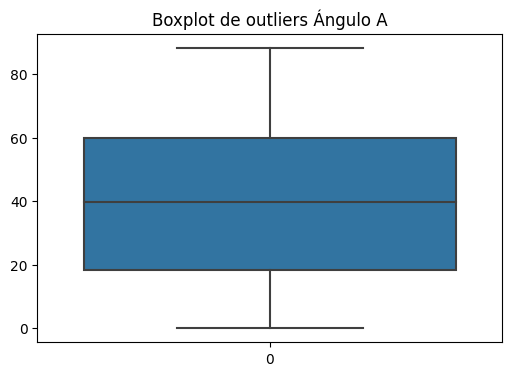

In [102]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data['A'])
plt.title('Boxplot de outliers Ángulo A')
plt.show()

In [103]:
### Voy a crear un dataframe nuevo con datos de 'A' que estén en un determinado rango, por ejemplo, entre 20 y 80
df_1 = data[(data['A'] >= 20) & (data['A'] <= 80)]

In [104]:
df_1

,t,A,S
1,19:38:11,42.48,-35.13
2,19:38:12,72.44,-16.07
3,19:38:13,74.97,-14.93
4,19:38:14,76.32,3.98
9,19:38:19,51.33,-31.85
...,...,...,...
633,19:48:43,26.01,-10.35
635,19:48:45,60.98,-16.97
636,19:48:46,32.66,-20.63
638,19:48:48,27.65,-14.81


In [105]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 461 entries, 1 to 639
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       461 non-null    object 
 1   A       461 non-null    float64
 2   S       461 non-null    float64
dtypes: float64(2), object(1)
memory usage: 14.4+ KB


In [106]:
### Como vemos, de este dataframe original nos hemos quedado con 461 valores, veremos si son relevantes para el análisis.

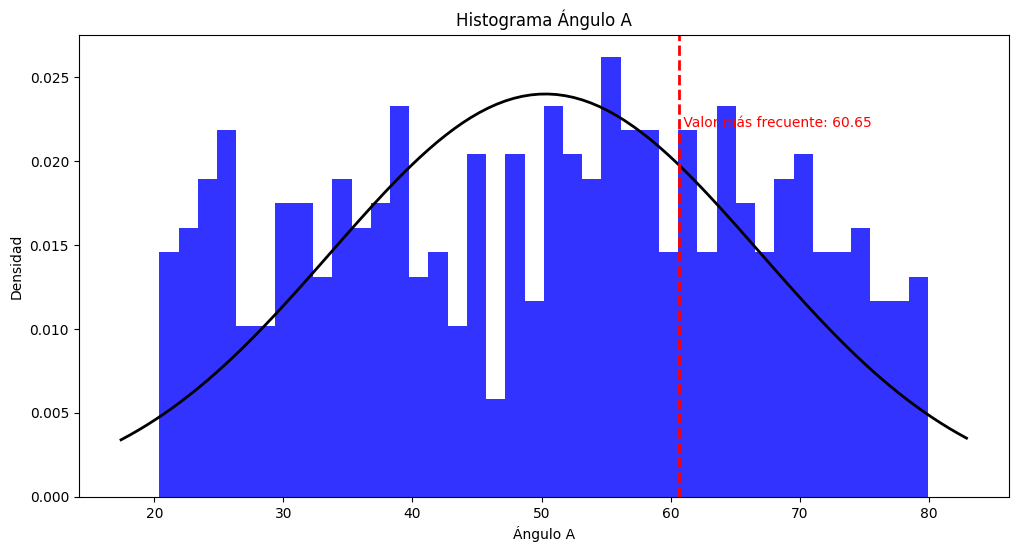

In [107]:
plt.figure(figsize=(12, 6))
df_1['A'].plot(kind='hist', bins=40, alpha=0.8, density=True, color='blue')

mu, std = df_1['A'].mean(), df_1['A'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

max_freq_value = df_1['A'].value_counts().idxmax()

plt.axvline(max_freq_value, color='red', linestyle='dashed', linewidth=2)

plt.text(max_freq_value, plt.ylim()[1]*0.8, ' Valor más frecuente: {:.2f}'.format(max_freq_value),color='red', ha='left')

plt.xlabel('Ángulo A')
plt.ylabel('Densidad')
plt.title('Histograma Ángulo A')

plt.show()

In [108]:
df_1.describe().T

,count,mean,std,min,25%,50%,75%,max
A,461.0,50.298048,16.624046,20.39,36.23,51.67,64.20,79.96
S,461.0,-11.184143,12.426444,-50.93,-16.79,-12.47,-7.48,66.44


Vamos a analizar varias cosas:
1 - El valor más frecuente (Moda) es de 60.65 y la media es 51.67, con lo cual vemos que la distribución está sesgada hacia la derecha,
    y hay una cantidad significativa de valores que son menores que la moda, lo que arrastra la media hacia abajo. Se necesitan más datos.
2 - La curva de la distribución. Una distribución normal tendría el pico donde la media, o al menos más cerca. 
3 - Hacemos el gráfico de línea para ver si con el recorte de datos podemos obtener otra lectura 

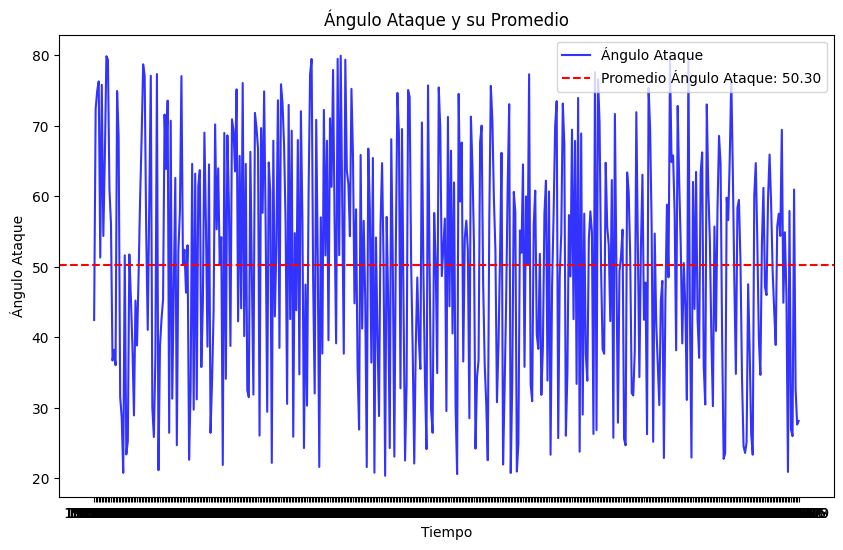

In [109]:
media_df1 = df_1['A'].mean()

plt.figure(figsize=(10, 6))
plt.plot(df_1['t'], df_1['A'], label='Ángulo Ataque', color='blue', alpha=0.8)
plt.axhline(y=media_df1, color='red', linestyle='--', label=f'Promedio Ángulo Ataque: {media_df1:.2f}')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo Ataque')
plt.title('Ángulo Ataque y su Promedio')
plt.legend()
plt.show()

Seguimos viendo cómo parece un sismógrafo pese a habernos quedado con los datos entre 20 y 80. 
Podemos ajustar los parámetros para poner el intervalo que queramos en la fórmula:
df_1 = data[(data['A'] >= X) & (data['A'] <= Y)]
Vamos a graficar las dos columnas juntas 'A' y 'S'

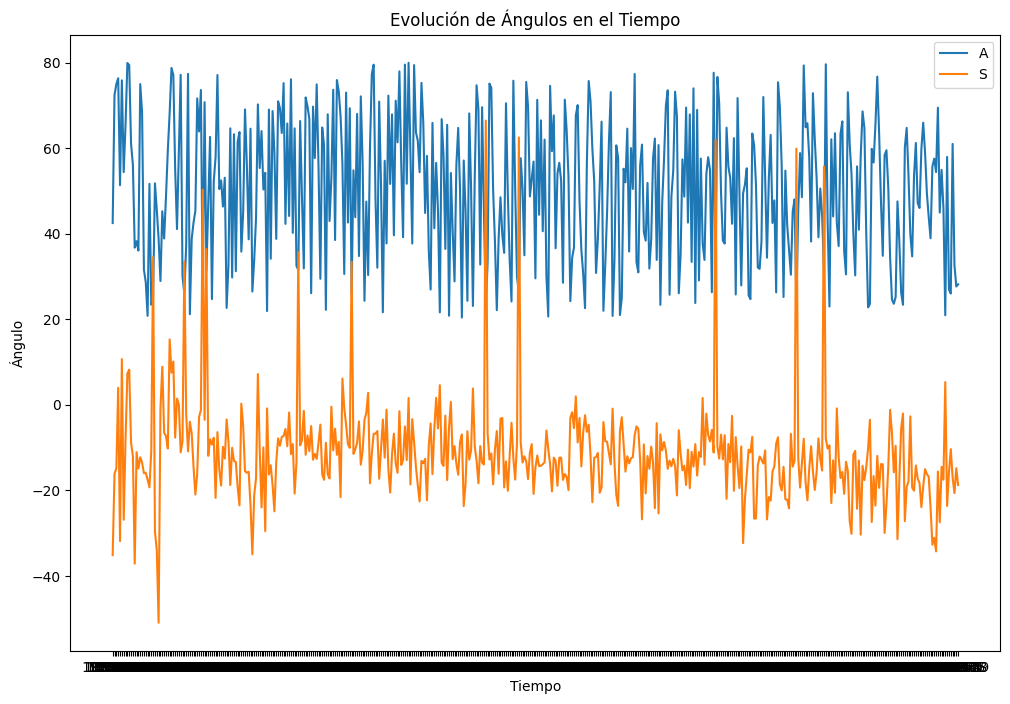

In [110]:
### Vamos a juntar los parámetros de la columna 'S'

plt.figure(figsize=(12, 8))
plt.plot(df_1['t'], df_1['A'], label='A')
plt.plot(df_1['t'], df_1['S'], label='S')

plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.title('Evolución de Ángulos en el Tiempo')
plt.legend()
plt.show()

Vamos a hacer el estudio del ángulo 'S'. Según hemos visto en el describe().T anterior, hay máximos y mínimos con mucha amplitud, 
Lo cual indica, sabiendo la naturaleza de los datos, que hay muchos outliers. Vamos a limpiar por IQR (rangos intercuartílicos)


In [112]:
Q1 = df_1.quantile(0.25)
Q3 = df_1.quantile(0.75)
IQR = Q3 - Q1

data_x = df_1[~((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 + 1.5 * IQR))).any(axis=1)]


C:\Users\Borja BOOTCAMP\AppData\Local\Temp\ipykernel_59904\3076096736.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_1.quantile(0.25)
C:\Users\Borja BOOTCAMP\AppData\Local\Temp\ipykernel_59904\3076096736.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_1.quantile(0.75)
C:\Users\Borja BOOTCAMP\AppData\Local\Temp\ipykernel_59904\3076096736.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_x = df_1[~((df_1 < (Q1 - 1.5 * IQR)) | (df_1 > (Q3 +

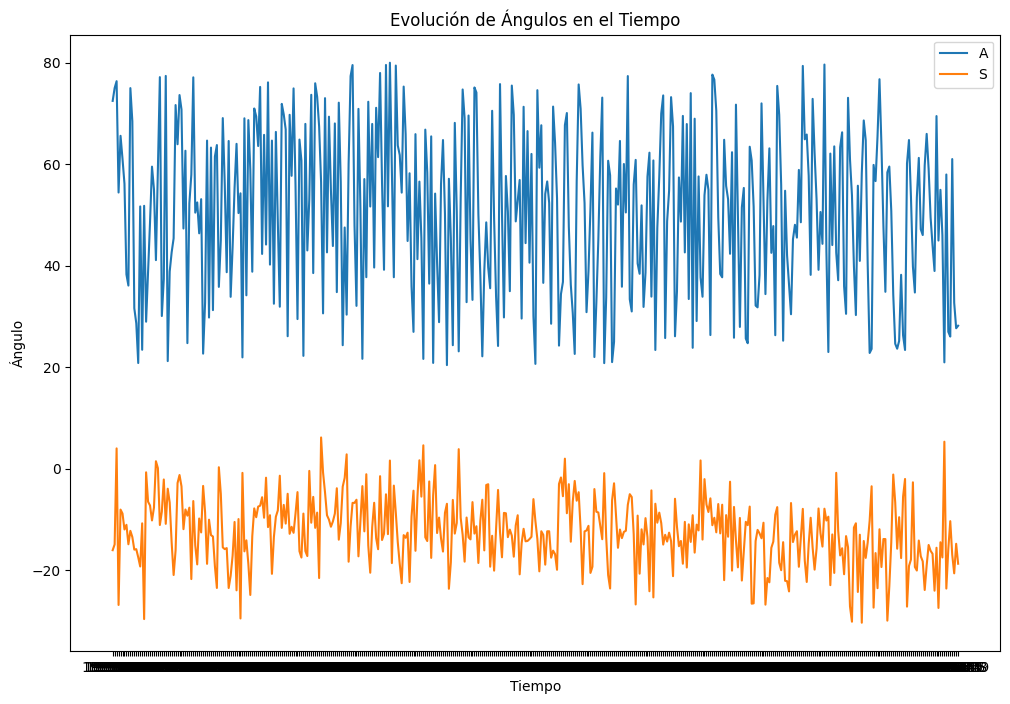

In [114]:
### Volvemos a graficar para ver el resultado

plt.figure(figsize=(12, 8))
plt.plot(data_x['t'], data_x['A'], label='A')
plt.plot(data_x['t'], data_x['S'], label='S')

plt.xlabel('Tiempo')
plt.ylabel('Ángulo')
plt.title('Evolución de Ángulos en el Tiempo')
plt.legend()
plt.show()

Vemos que tiene más sentido la gráfica. Aunque tiene mucho aspecto de sismógrafo, parece más coherente. Vamos a graficarlo por separado con la media


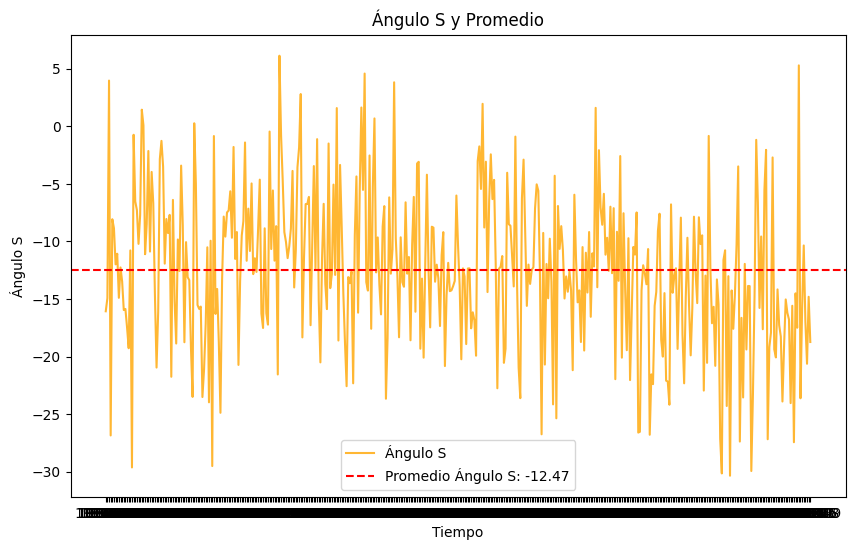

In [115]:
media_datax = data_x['S'].mean()

plt.figure(figsize=(10, 6))
plt.plot(data_x['t'], data_x['S'], label='Ángulo S', color='orange', alpha=0.8)
plt.axhline(y=media_datax, color='red', linestyle='--', label=f'Promedio Ángulo S: {media_datax:.2f}')
plt.xlabel('Tiempo')
plt.ylabel('Ángulo S')
plt.title('Ángulo S y Promedio')
plt.legend()
plt.show()

Vamos a graficar el histograma para ver la distribución de los datos. 

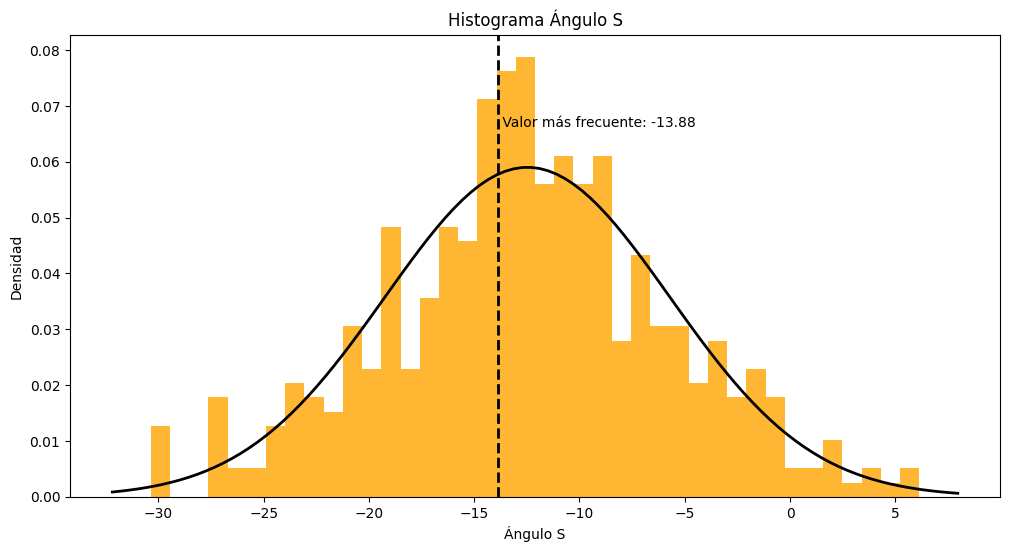

In [116]:
plt.figure(figsize=(12, 6))
data_x['S'].plot(kind='hist', bins=40, alpha=0.8, density=True, color='orange')

mu, std = data_x['S'].mean(), data_x['S'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

max_freq_valuex = data_x['S'].value_counts().idxmax()

plt.axvline(max_freq_valuex, color='black', linestyle='dashed', linewidth=2)

plt.text(max_freq_valuex, plt.ylim()[1]*0.8, ' Valor más frecuente: {:.2f}'.format(max_freq_valuex),color='black', ha='left')

plt.xlabel('Ángulo S')
plt.ylabel('Densidad')
plt.title('Histograma Ángulo S')
plt.show()

Como podemos ver, la distribución se parece más a la gaussiana, y los valores máximos (media y moda) se encuentran muy cercanos
Estos datos sí pueden resultar relevantes para el estudio que estamos realizando.

Vamos a estudiar el dataframe que apartamos al principio que contiene solamente 't' y 'V', que se llamaba "dfv"

In [117]:
dfv.head(), dfv.tail()

(          t     V
 0  19:38:10  0.00
 1  19:38:11  0.00
 2  19:38:11 -1.36
 3  19:38:11 -5.78
 4  19:38:11 -3.14,
              t    V
 5933  19:49:57  0.0
 5934  19:49:57  0.0
 5935  19:49:57  0.0
 5936  19:49:57  0.0
 5937  19:49:57  0.0)

Al igual que en el ángulo 'A' teníamos que coger en cada segundo medido el valor máximo, en este caso el valor correcto es el mínimo.
Formulamos, mediante una modificación de la función lambda anterior:

In [118]:
grouped_v = dfv.groupby('t', as_index=False)

min_v_s = grouped_v.apply(lambda x: x.loc[x['V'].idxmin()])

min_v_s = min_v_s.reset_index(drop=True)

print(min_v_s)

            t      V
0    19:38:10   0.00
1    19:38:11  -6.68
2    19:38:12   0.00
3    19:38:13 -72.04
4    19:38:14 -79.42
..        ...    ...
654  19:49:53   0.00
655  19:49:54   0.00
656  19:49:55   0.00
657  19:49:56  -0.48
658  19:49:57   0.00

[659 rows x 2 columns]


Vamos a graficar el histograma para ver la distribución de los datos.

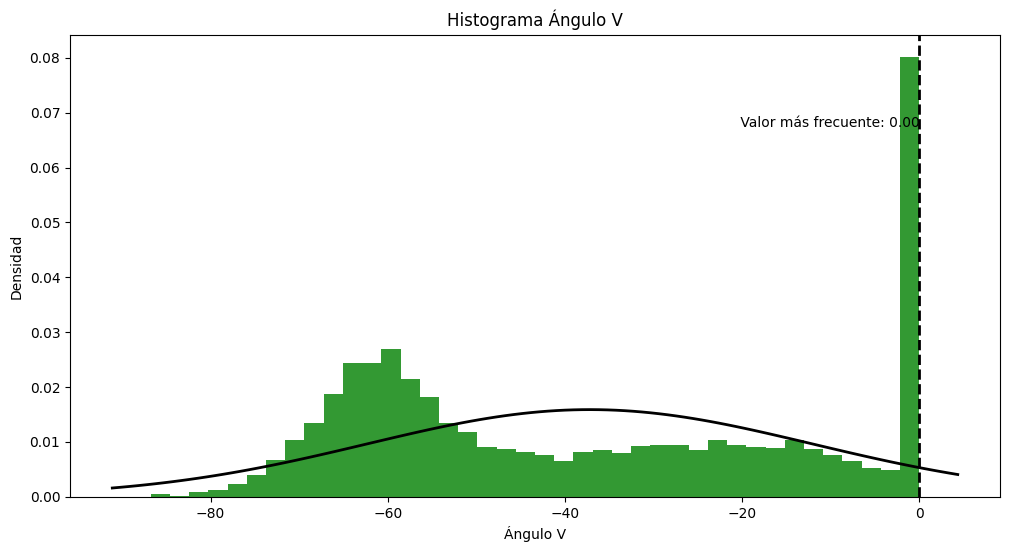

In [119]:
plt.figure(figsize=(12, 6))
dfv['V'].plot(kind='hist', bins=40, alpha=0.8, density=True, color='green')

mu, std = dfv['V'].mean(), dfv['V'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

max_freq_valuev = dfv['V'].value_counts().idxmax()

plt.axvline(max_freq_valuev, color='black', linestyle='dashed', linewidth=2)

plt.text(max_freq_valuev, plt.ylim()[1]*0.8, ' Valor más frecuente: {:.2f}'.format(max_freq_valuev),color='black', ha='right')

plt.xlabel('Ángulo V')
plt.ylabel('Densidad')
plt.title('Histograma Ángulo V')
plt.show()

Vemos que nos pasa lo mismo que anteriormente con el valor 'A'. Vamos a quedarnos con valores entre -80 y -20

In [121]:
df_2 = dfv[(dfv['V'] >= -80) & (dfv['V'] <= -20)]

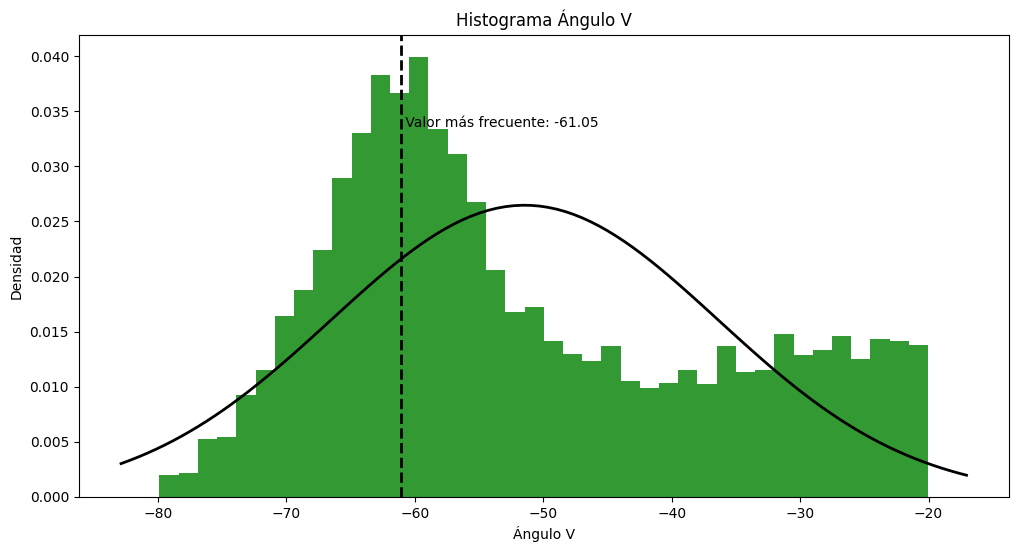

In [122]:
plt.figure(figsize=(12, 6))
df_2['V'].plot(kind='hist', bins=40, alpha=0.8, density=True, color='green')

mu, std = df_2['V'].mean(), df_2['V'].std()

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

max_freq_valuev = df_2['V'].value_counts().idxmax()

plt.axvline(max_freq_valuev, color='black', linestyle='dashed', linewidth=2)

plt.text(max_freq_valuev, plt.ylim()[1]*0.8, ' Valor más frecuente: {:.2f}'.format(max_freq_valuev),color='black', ha='left')

plt.xlabel('Ángulo V')
plt.ylabel('Densidad')
plt.title('Histograma Ángulo V')
plt.show()

Vemos cómo ha cambiado el gráfico. Muy notable que el valor más frecuente que aparece ahora es más cercano a la naturaleza de los datos.
Aún así, vemos cómo hay mucho sesgo hacia la izquierda. Sigue habiendo mucha cantidad de datos en la parte derecha de la media. 
Tendríamos que ver si esa cantidad es relevante en el estudio. 